<a href="https://colab.research.google.com/github/krishna1997pandit/krishna-kumar-gautam/blob/main/ipl_auction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import modules


from bs4 import BeautifulSoup as bs4
import requests

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# request page source from URL

In [8]:
url = "https://www.iplt20.com/auction/2022"
r = requests.get(url)
print(r)

<Response [200]>


In [ ]:
soup = BeautifulSoup(r.text, "lxml")
print(soup)

In [12]:
table = soup.find("table" , class_ = "ih-td-tab auction-tbl")
title = table.find_all("th" )

print(title)

[<th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>, <th class="skip-filter" style="width:25%;">FUNDS REMAINING</th>, <th class="skip-filter" style="width:25%;">OVERSEAS PLAYERS </th>, <th class="skip-filter" style="width:25%;">TOTAL PLAYERS</th>]


In [13]:
header=[]
for i in title:
  name = i.text
  header.append(name)

print(header)

['TEAM', 'FUNDS REMAINING', 'OVERSEAS PLAYERS ', 'TOTAL PLAYERS']


In [14]:
df =pd.DataFrame(columns = header)
print(df)

Empty DataFrame
Columns: [TEAM, FUNDS REMAINING, OVERSEAS PLAYERS , TOTAL PLAYERS]
Index: []


In [15]:
rows = table.find_all("tr")
#print(rows)
for i in rows[1:]:
  first_td = i.find_all("td")[0].find("div", class_= "ih-pt-ic").text.strip("\n")
  data = i.find_all("td")[1:]
  #print(data)
  row = [tr.text for tr in data]
  row.insert(0,first_td)
  l = len(df)
  df.loc[l]=row

print(df)


                          TEAM FUNDS REMAINING OVERSEAS PLAYERS  TOTAL PLAYERS
0          Chennai Super Kings    ₹2,95,00,000                 8            25
1               Delhi Capitals      ₹10,00,000                 7            24
2               Gujarat Titans      ₹15,00,000                 8            23
3        Kolkata Knight Riders      ₹45,00,000                 8            25
4         Lucknow Super Giants              ₹0                 7            21
5               Mumbai Indians      ₹10,00,000                 8            25
6                 Punjab Kings    ₹3,45,00,000                 7            25
7             Rajasthan Royals      ₹95,00,000                 8            24
8  Royal Challengers Bangalore    ₹1,55,00,000                 8            22
9          Sunrisers Hyderabad      ₹10,00,000                 8            23


In [16]:
t_player=df.to_csv("ipl auction stats.csv")
print(t_player)

None


shape of dataframe

In [23]:
df.shape

(10, 4)

find the columns name

In [24]:
col=df.columns
print(col)

Index(['TEAM', 'FUNDS REMAINING', 'ENGLISH PLAYERS', 'TOTAL PLAYERS'], dtype='object')


find index range

In [82]:
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

# find datatype each column

In [83]:
df.dtypes

TEAM                 object
FUNDS REMAINING      object
OVERSEAS PLAYERS     object
TOTAL PLAYERS        object
dtype: object

# change dtype overseas  and total player

In [92]:
print(df["OVERSEAS PLAYERS "].value_counts())


8    7
7    3
Name: OVERSEAS PLAYERS , dtype: int64


reanme "OVERSEAS PLAYERS " CONVERT into "ENGLISH PLAYER"

In [19]:
df.rename(columns={"OVERSEAS PLAYERS ": "ENGLISH PLAYERS"}, inplace="true")
print(df)

                          TEAM FUNDS REMAINING ENGLISH PLAYERS TOTAL PLAYERS
0          Chennai Super Kings    ₹2,95,00,000               8            25
1               Delhi Capitals      ₹10,00,000               7            24
2               Gujarat Titans      ₹15,00,000               8            23
3        Kolkata Knight Riders      ₹45,00,000               8            25
4         Lucknow Super Giants              ₹0               7            21
5               Mumbai Indians      ₹10,00,000               8            25
6                 Punjab Kings    ₹3,45,00,000               7            25
7             Rajasthan Royals      ₹95,00,000               8            24
8  Royal Challengers Bangalore    ₹1,55,00,000               8            22
9          Sunrisers Hyderabad      ₹10,00,000               8            23


find the name of all team

In [99]:
df["TEAM"]

0            Chennai Super Kings
1                 Delhi Capitals
2                 Gujarat Titans
3          Kolkata Knight Riders
4           Lucknow Super Giants
5                 Mumbai Indians
6                   Punjab Kings
7               Rajasthan Royals
8    Royal Challengers Bangalore
9            Sunrisers Hyderabad
Name: TEAM, dtype: object

change dtype of english players and total players

In [20]:
df=df.astype({"ENGLISH PLAYERS":int,"TOTAL PLAYERS":int})
df.dtypes

TEAM               object
FUNDS REMAINING    object
ENGLISH PLAYERS     int64
TOTAL PLAYERS       int64
dtype: object

# import matplotlib library using for data visualization and graph representation

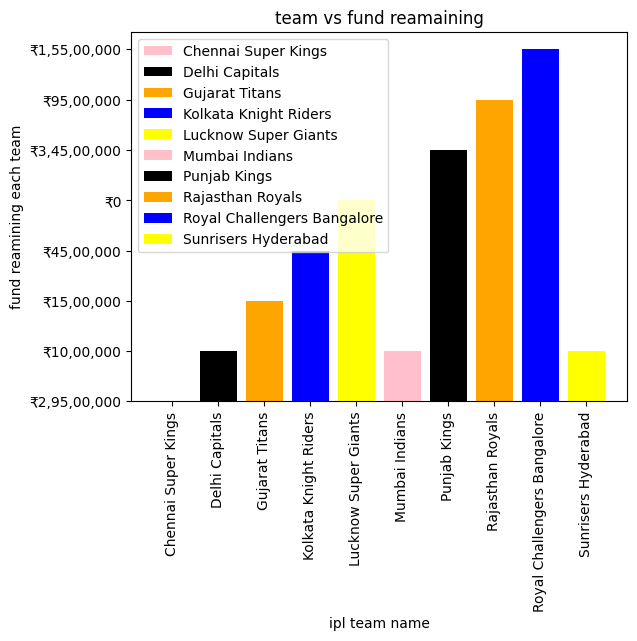

In [34]:
x=df["TEAM"]
y=df["FUNDS REMAINING"]
colr=["pink","black","orange","blue","yellow"]
plt.bar(x,y, color=colr,label=x)
plt.title("team vs fund reamaining")
plt.xlabel("ipl team name")
plt.ylabel("fund reamining each team")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# create pie chart

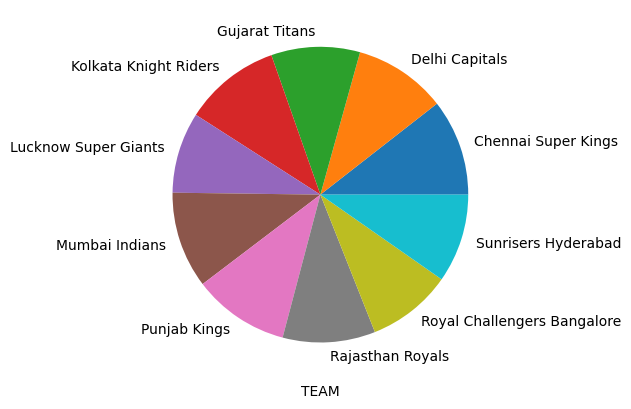

In [51]:
y=df["TOTAL PLAYERS"]
x=df["TEAM"]
z=[x,y]
plt.pie(y, labels=x)
plt.xlabel("TEAM")
plt.show()


# create scatter chart

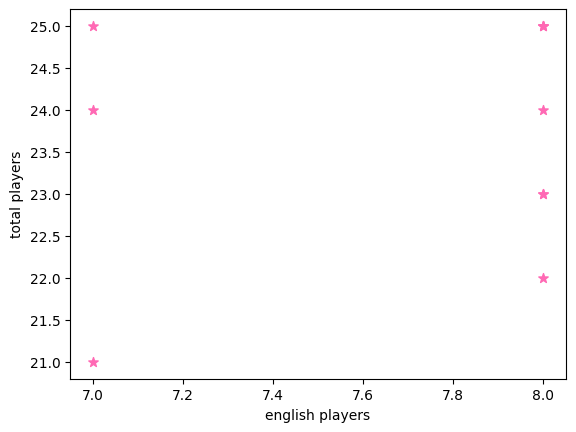

In [60]:
y=df["TOTAL PLAYERS"]
x=df["ENGLISH PLAYERS"]
plt.scatter(x,y, marker="*", s=50,color="hotpink")
plt.xlabel("english players")
plt.ylabel("total players")
plt.show()